In [5]:
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy.interpolate as ip
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from scipy.interpolate import Rbf
import scipy.stats as stats
import process_func as prf
from scipy.optimize import curve_fit
from scipy.special import gamma
from scipy.optimize import minimize
import matplotlib.colors as mcolors
import glob
from lofarantpos.plotutil import plot_station, add_background
from lofarantpos.db import LofarAntennaDatabase
from lofarantpos.plotutil import plot_superterp
from lofarantpos.plotutil import plot_lba
from lofarantpos.plotutil import plot_core


def Get_Datadat(source_dir, file_name):
    #load in data
    theta = 90 - np.loadtxt(source_dir+file_name+'.dat',usecols = (4), skiprows = 1, max_rows = 1)
    phi = np.loadtxt(source_dir+file_name+'.dat',usecols = (5), skiprows = 1, max_rows = 1)

    core_x = np.loadtxt(source_dir+file_name+'.dat',usecols = (2), skiprows = 1, max_rows = 1)
    core_y = np.loadtxt(source_dir+file_name+'.dat',usecols = (3), skiprows = 1, max_rows = 1)
    err_core_x = np.loadtxt(source_dir+file_name+'.dat',usecols = (7), skiprows = 1, max_rows = 1)
    err_core_y = np.loadtxt(source_dir+file_name+'.dat',usecols = (8), skiprows = 1, max_rows = 1)

    energy = np.loadtxt(source_dir+file_name+'.dat',usecols = (6), skiprows = 1, max_rows = 1)
    err_energy = np.loadtxt(source_dir+file_name+'.dat',usecols = (13), skiprows = 1, max_rows = 1)

    r_M = np.loadtxt(source_dir+file_name+'.dat',usecols = (9), skiprows = 1, max_rows = 1)
    r_M_err = np.loadtxt(source_dir+file_name+'.dat',usecols = (10), skiprows = 1, max_rows = 1)
    N_ch = np.loadtxt(source_dir+file_name+'.dat',usecols = (14), skiprows = 1, max_rows = 1)
    N_ch_err = np.loadtxt(source_dir+file_name+'.dat',usecols = (15), skiprows = 1, max_rows = 1)

    detect_cord_x = np.loadtxt('all_coords.txt',usecols = 0, max_rows= 20)
    detect_cord_y = np.loadtxt('all_coords.txt',usecols = 1, max_rows= 20)
    detect_dens = np.loadtxt(source_dir+file_name+'.dat', usecols = 8, skiprows = 4, max_rows = 20)
    timings = np.loadtxt(source_dir+file_name+'.dat', usecols = 5, skiprows = 4, max_rows = 20)
    detect_coords = np.loadtxt('all_coords.txt', max_rows = 20)

    return theta, phi, core_x, core_y, err_core_x, err_core_y, energy, err_energy, r_M, r_M_err, N_ch, N_ch_err, detect_cord_x, detect_cord_y, detect_dens, timings, detect_coords

def Get_Datatxt(source_dir, file_name):
    #load in data
    theta = 90 - np.loadtxt(source_dir+file_name+'.txt',usecols = (4), skiprows = 1, max_rows = 1)
    phi = np.loadtxt(source_dir+file_name+'.txt',usecols = (5), skiprows = 1, max_rows = 1)

    core_x = np.loadtxt(source_dir+file_name+'.txt',usecols = (2), skiprows = 1, max_rows = 1)
    core_y = np.loadtxt(source_dir+file_name+'.txt',usecols = (3), skiprows = 1, max_rows = 1)
    err_core_x = np.loadtxt(source_dir+file_name+'.txt',usecols = (7), skiprows = 1, max_rows = 1)
    err_core_y = np.loadtxt(source_dir+file_name+'.txt',usecols = (8), skiprows = 1, max_rows = 1)

    energy = np.loadtxt(source_dir+file_name+'.txt',usecols = (6), skiprows = 1, max_rows = 1)
    err_energy = np.loadtxt(source_dir+file_name+'.txt',usecols = (13), skiprows = 1, max_rows = 1)

    r_M = np.loadtxt(source_dir+file_name+'.txt',usecols = (9), skiprows = 1, max_rows = 1)
    r_M_err = np.loadtxt(source_dir+file_name+'.txt',usecols = (10), skiprows = 1, max_rows = 1)
    N_ch = np.loadtxt(source_dir+file_name+'.txt',usecols = (14), skiprows = 1, max_rows = 1)
    N_ch_err = np.loadtxt(source_dir+file_name+'.txt',usecols = (15), skiprows = 1, max_rows = 1)

    detect_cord_x = np.loadtxt('all_coords.txt',usecols = 0)
    detect_cord_y = np.loadtxt('all_coords.txt',usecols = 1)
    detect_dens = np.loadtxt(source_dir+file_name+'.txt', usecols = 8, skiprows = 4, max_rows = 40)
    timings = np.loadtxt(source_dir+file_name+'.txt', usecols = 5, skiprows = 4, max_rows = 40)
    detect_coords = np.loadtxt('all_coords.txt')

    return theta, phi, core_x, core_y, err_core_x, err_core_y, energy, err_energy, r_M, r_M_err, N_ch, N_ch_err, detect_cord_x, detect_cord_y, detect_dens, timings, detect_coords

def Getcounts(source_dir, file_name):
   
    counts = np.loadtxt(source_dir + file_name + '.txt')

    return counts

In [3]:
nm = '20230219_0056_event_90513'
name2 = 'counts'+nm
source1 = '/vol/astro7/lofar/lvdongen/OutputV2min/'

theta, phi, core_x, core_y, err_core_x, err_core_y, energy, err_energy, r_M, r_M_err, N_ch, N_ch_err, detect_cord_x, detect_cord_y, detect_dens, timings, detect_coords = Get_Datatxt(source1, nm)
counts = Getcounts(source1, name2)

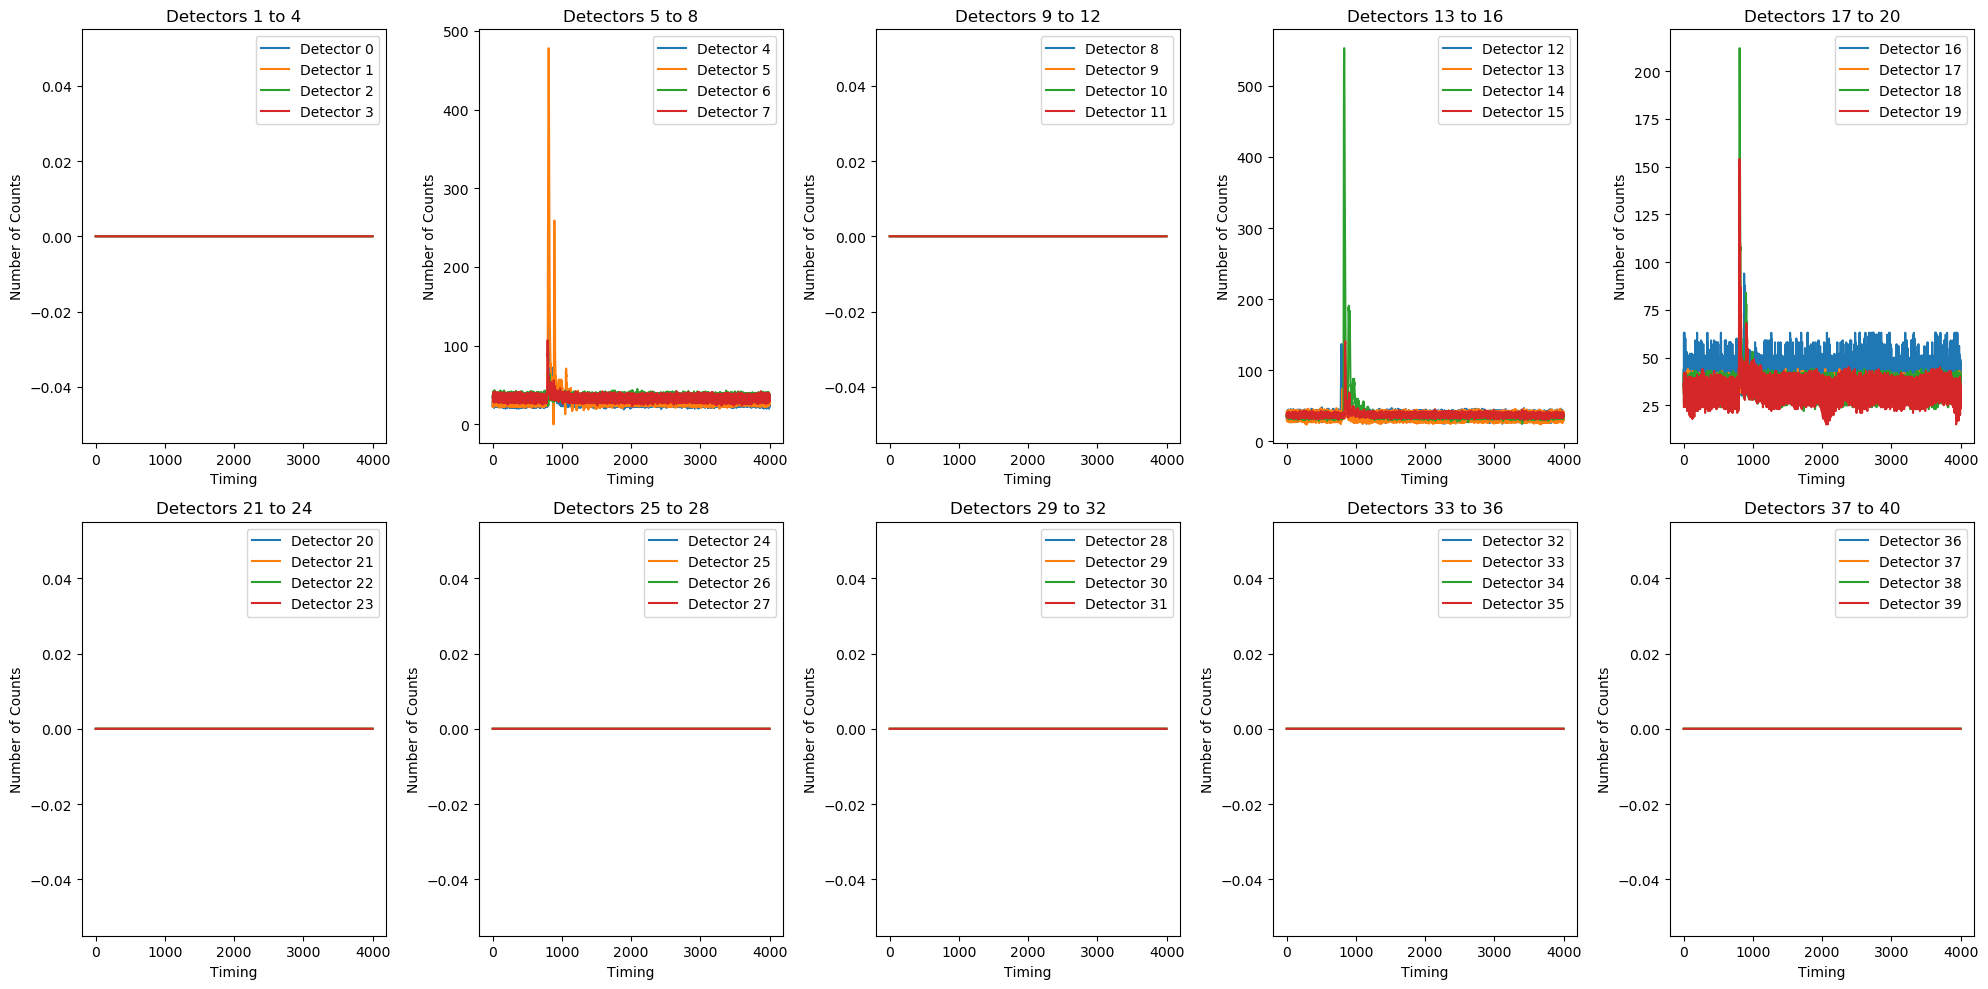

In [4]:
num_detectors = 40
detectors_per_plot = 4
num_plots = num_detectors // detectors_per_plot

# Create a 2x5 grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))  

x_axis = np.arange(counts.shape[0]) 

# Flatten the axs array to iterate over it easily
axs = axs.flatten()


for i in range(num_plots):
    ax = axs[i]
    start_index = i * detectors_per_plot
    end_index = start_index + detectors_per_plot

    for j in range(start_index, end_index):
        ax.plot(x_axis, counts[:, j], label=f'Detector {j}')

    ax.set_title(f'Detectors {start_index + 1} to {end_index}')
    ax.set_xlabel('Timing')
    ax.set_ylabel('Number of Counts')
    ax.legend()

plt.tight_layout()  
plt.show()


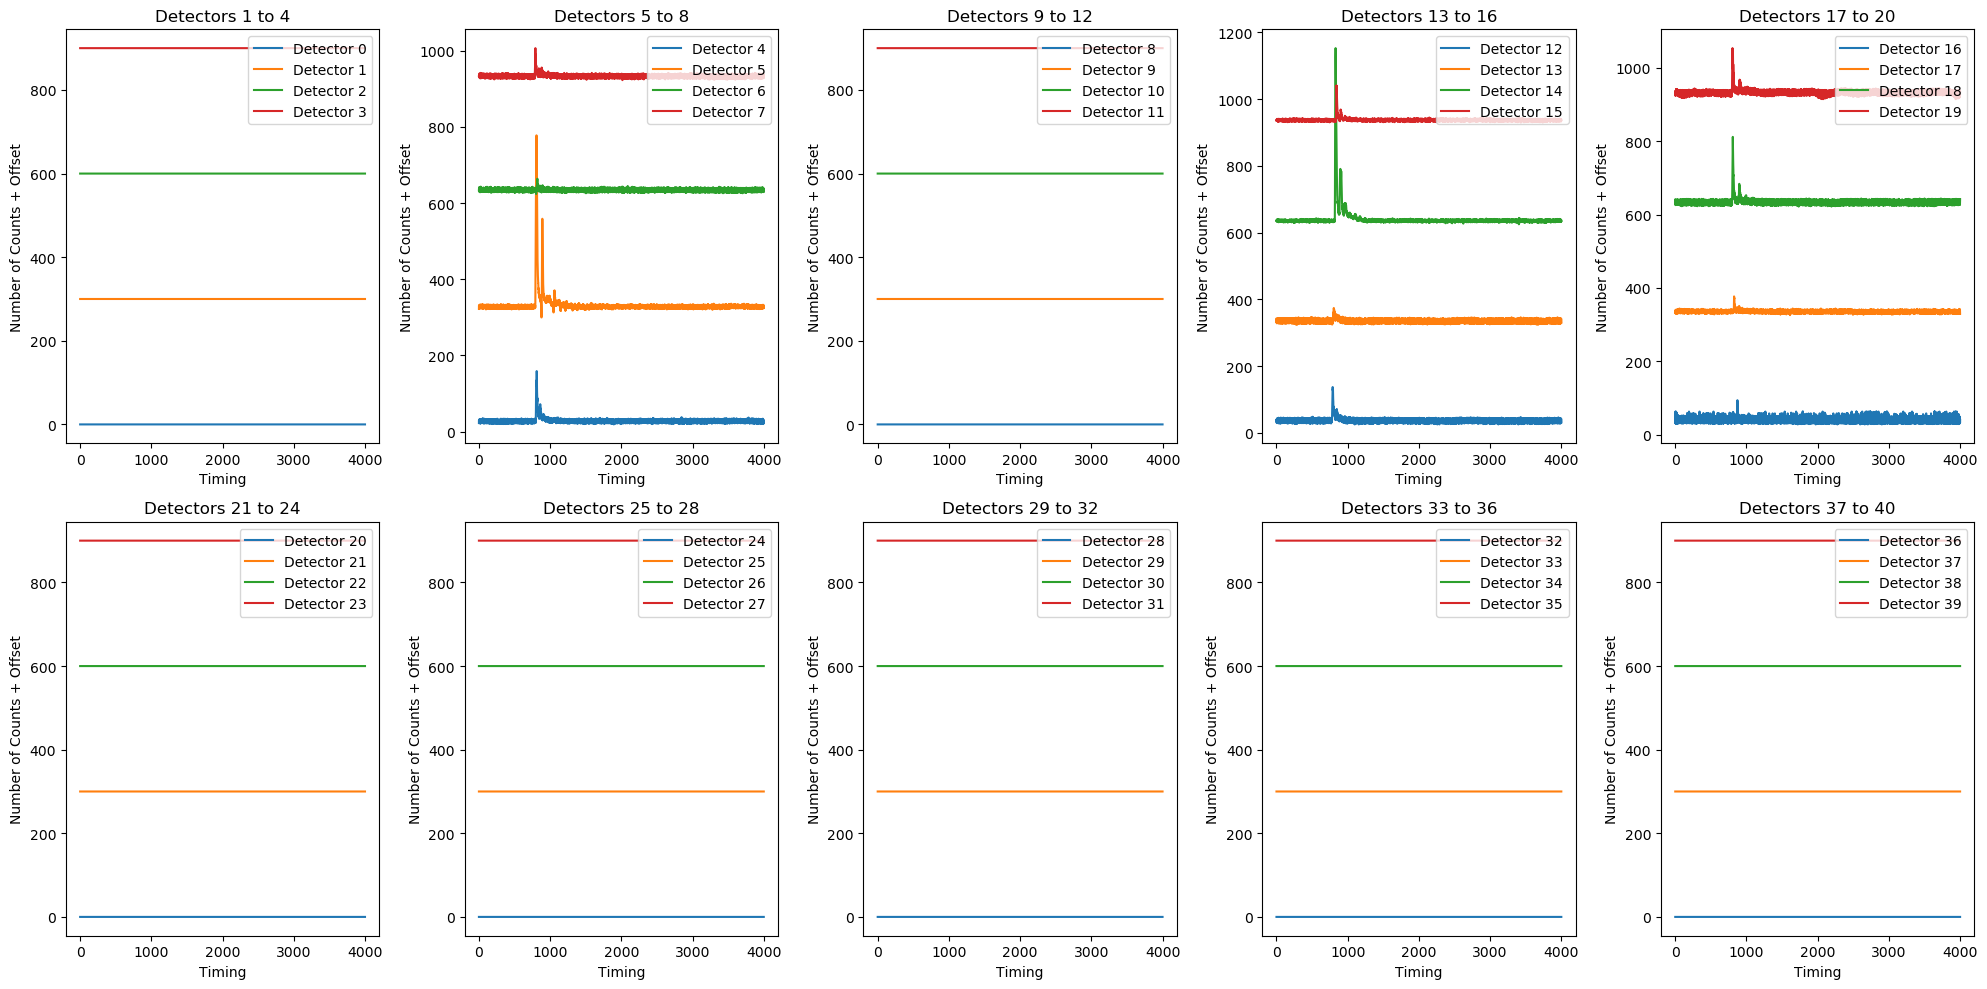

In [5]:
num_detectors = 40
detectors_per_plot = 4
num_plots = num_detectors // detectors_per_plot

# Create a 2x5 grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))  

x_axis = np.arange(counts.shape[0]) 

# Flatten the axs array to iterate over it easily
axs = axs.flatten()

offset = 300

for i in range(num_plots):
    ax = axs[i]
    start_index = i * detectors_per_plot
    end_index = start_index + detectors_per_plot

    for j in range(start_index, end_index):
        ax.plot(x_axis, counts[:, j] + (j - start_index) * offset, label=f'Detector {j}')

    ax.set_title(f'Detectors {start_index + 1} to {end_index}')
    ax.set_xlabel('Timing')
    ax.set_ylabel('Number of Counts + Offset')
    ax.legend(loc='upper right')

plt.tight_layout()  
plt.show()

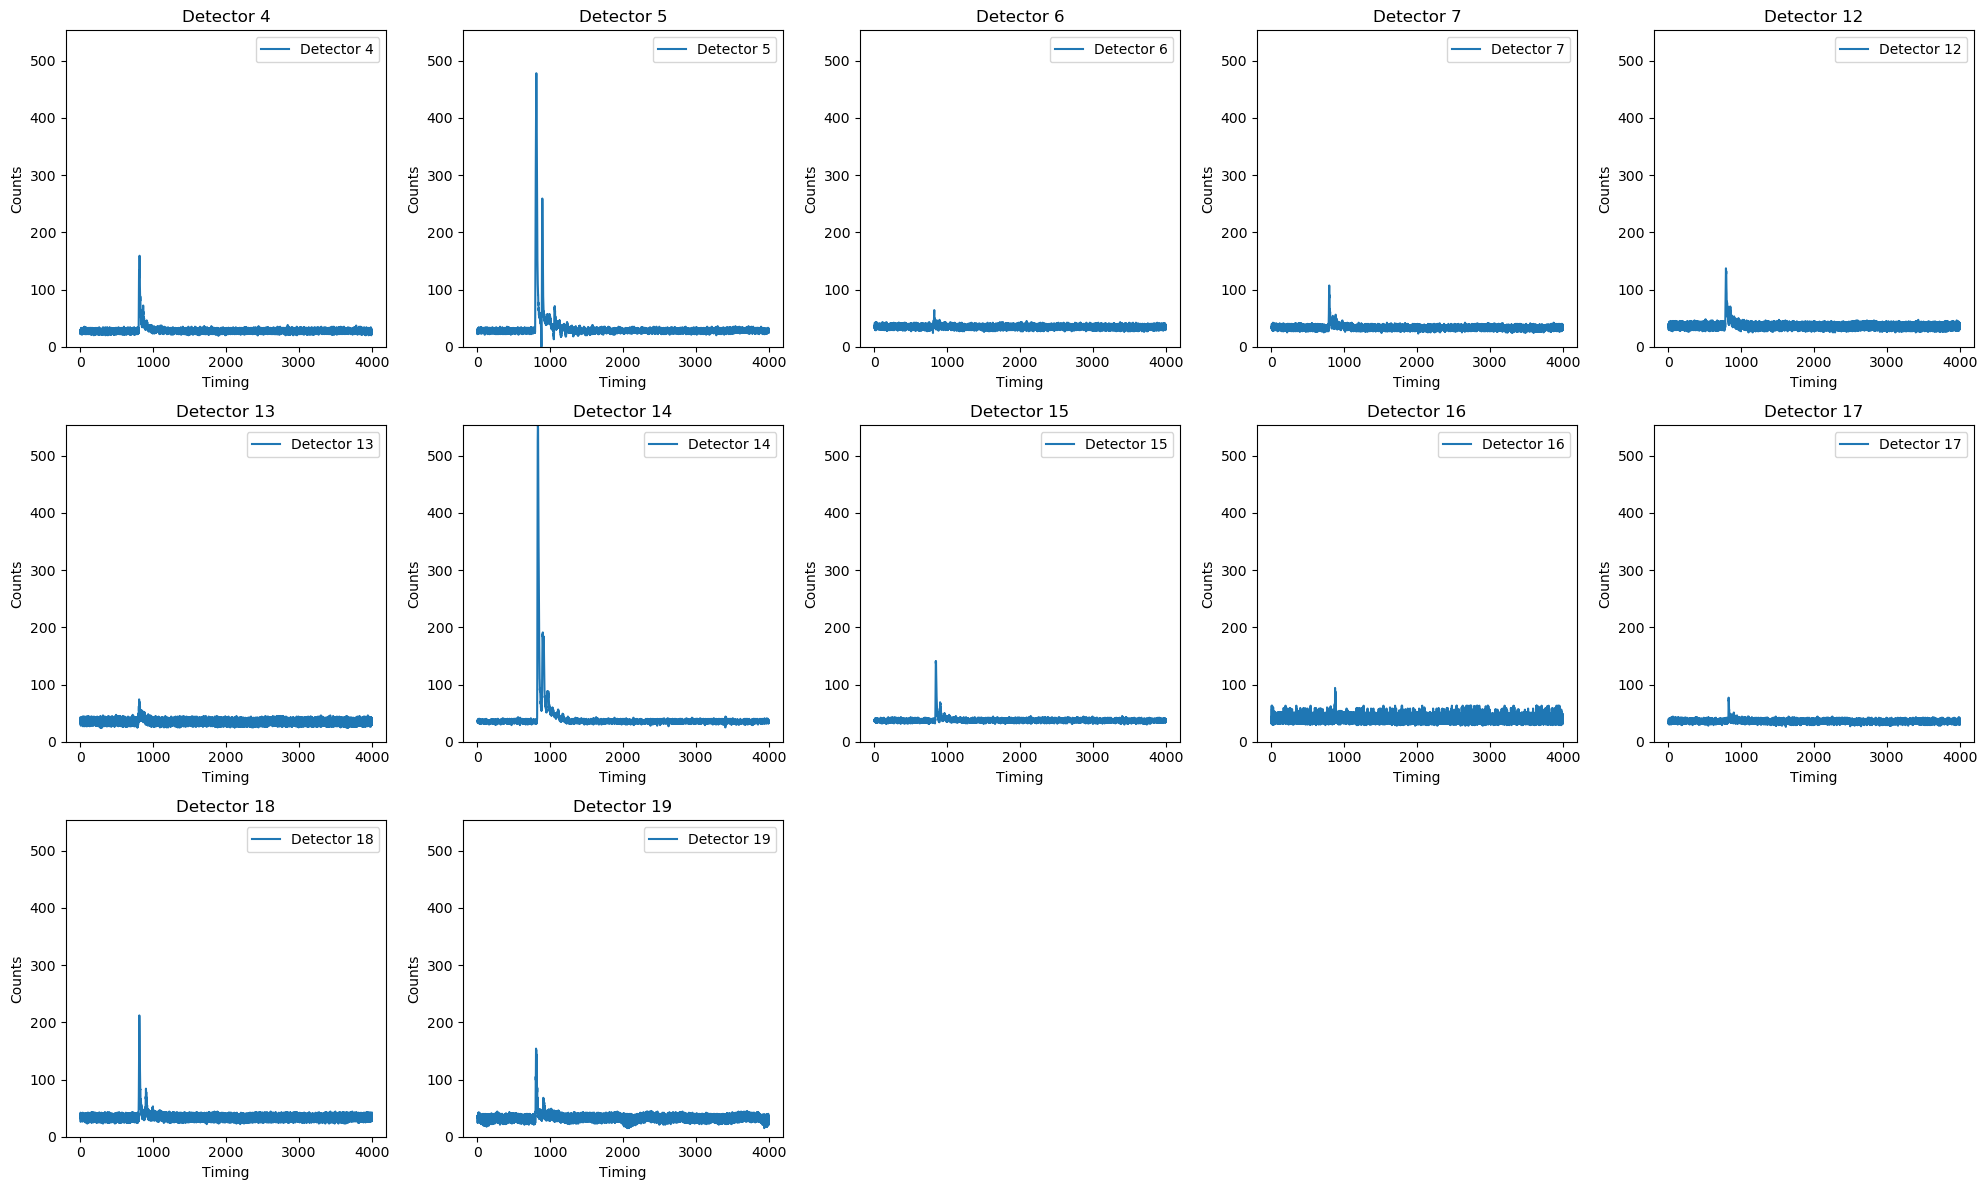

In [6]:
detectors_with_positive_counts = [
    j for j in range(counts.shape[1]) if np.any(counts[:, j] > 0)
]

num_positive_detectors = len(detectors_with_positive_counts)

# Calculate the number of rows and columns for the grid
cols = 5  # Fix columns to a reasonable number, e.g., 5
rows = (num_positive_detectors + cols - 1) // cols  # Ceiling division

# Create the grid of subplots
fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# Flatten axs array to handle it easily (even if it's 1D or 2D)
if rows * cols > 1:
    axs = axs.flatten()
else:
    axs = [axs]  # Ensure it's always iterable

# Plot each detector separately
for i, detector_index in enumerate(detectors_with_positive_counts):
    ax = axs[i]
    ax.plot(
        np.arange(counts.shape[0]),
        counts[:, detector_index],
        label=f'Detector {detector_index}'
    )
    ax.set_title(f'Detector {detector_index}')
    ax.set_xlabel('Timing')
    ax.set_ylabel('Counts')
    ax.legend(loc='upper right')
    ax.set_ylim(0, np.max(counts))
# Remove unused subplots
for j in range(num_positive_detectors, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

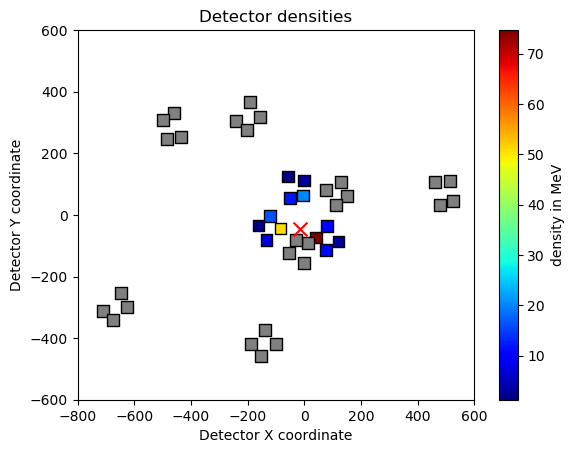

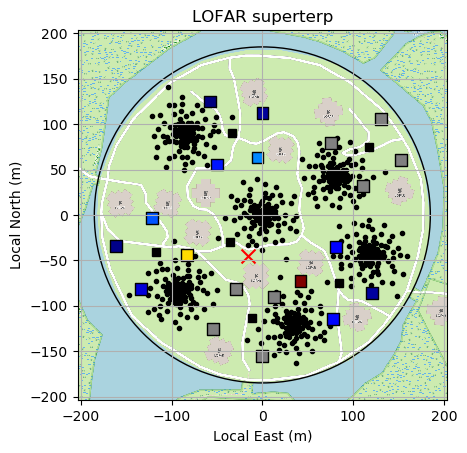

In [19]:
non_zero_mask = detect_dens > 0
zero_mask = detect_dens == 0


fig = plt.figure()
ax = fig.add_subplot(111)

#Plot non-zero values with color mapping
norm = mcolors.Normalize(vmin=np.min(detect_dens[non_zero_mask]), vmax=np.max(detect_dens[non_zero_mask]))
scatter_non_zero = ax.scatter(detect_cord_x[non_zero_mask], detect_cord_y[non_zero_mask], c=detect_dens[non_zero_mask], cmap='jet', edgecolor='black', marker='s', norm=norm, s = 70)

#Plot inactive detectors gray
scatter_zero = ax.scatter(detect_cord_x[zero_mask], detect_cord_y[zero_mask], c='gray', edgecolor='black', marker='s', s = 70)

#Plot core position
plt.scatter(core_x, core_y, color='red', marker='x', s=100, label='Core Position')


#Plot superterp with 20 detectors and core position
db = LofarAntennaDatabase()
centre = db.phase_centres["CS002LBA"]

plot_superterp(background='openstreetmap', tilestyle=None)




plt.scatter(detect_cord_x[non_zero_mask], detect_cord_y[non_zero_mask], c=detect_dens[non_zero_mask], cmap='jet', edgecolor='black', marker='s', norm=norm, s = 70)
plt.scatter(detect_cord_x[zero_mask], detect_cord_y[zero_mask], c='gray', edgecolor='black', marker='s', s = 70)
plt.scatter(core_x, core_y, color='red', marker='x', s=100, label='Core Position')

ax.set_xlim(-800,600)
ax.set_ylim(-600,600)
ax.set_title("Detector densities")
ax.set_xlabel('Detector X coordinate')
ax.set_ylabel('Detector Y coordinate')
fig.colorbar(scatter_non_zero, label='density in MeV')


#add_background(ax, centre, 'luchtfoto')
#plot_superterp(background='openstreetmap', tilestyle=None)
#plot_lba("CS001", c=list(range(96)))

plt.grid(True)
plt.show()

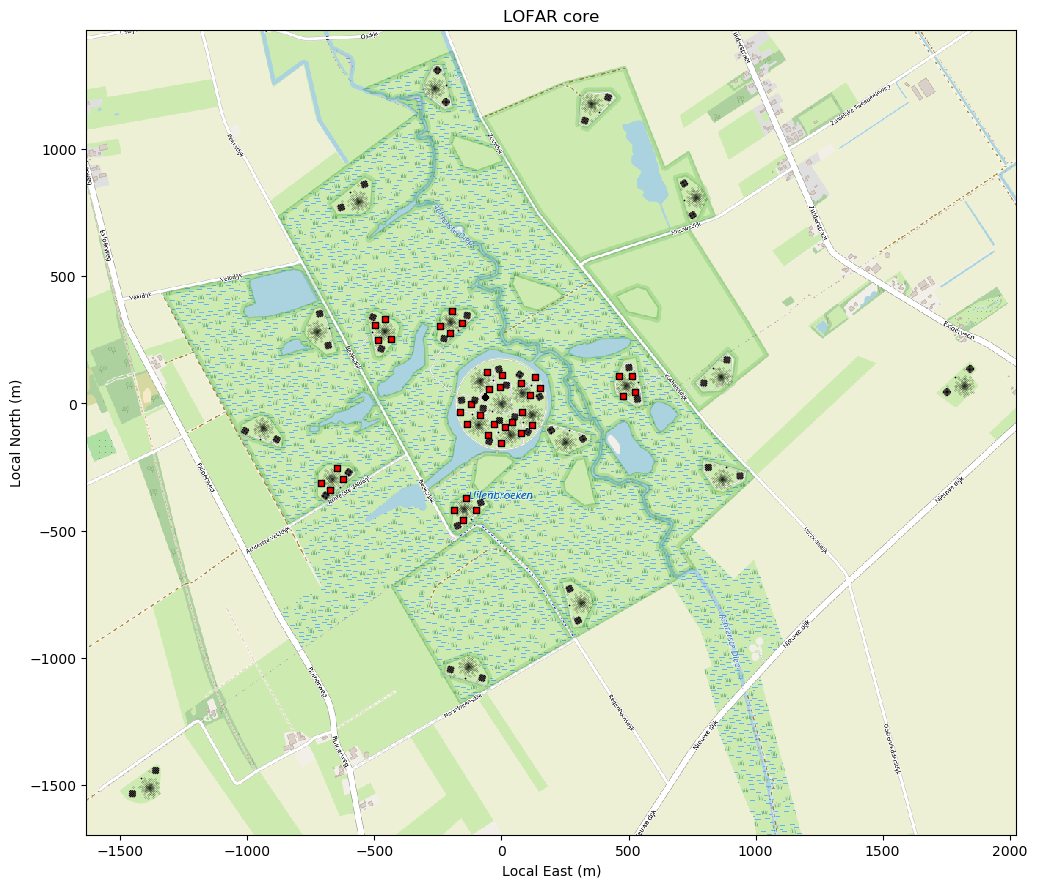

In [14]:
with plt.rc_context({"lines.markersize": 0.3, "figure.figsize": (12, 12)}):
    plot_core(background="openstreetmap", tilestyle="filled", circle=False)
plt.scatter(detect_cord_x, detect_cord_y, c='red', edgecolor='black', marker='s', s = 15)

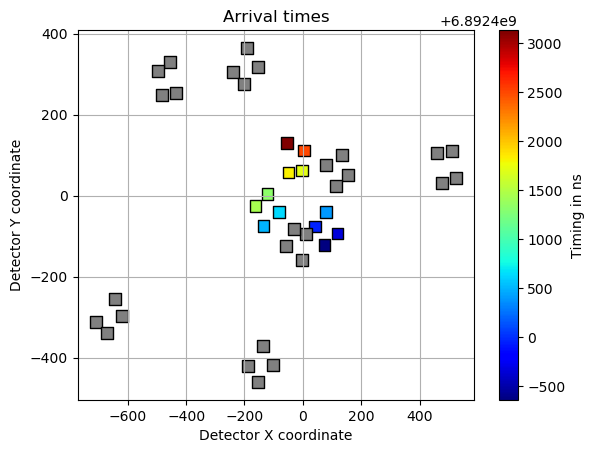

In [ ]:
non_zero_mask = timings > 0
zero_mask = timings == 0

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot non-zero values with color mapping
norm = mcolors.Normalize(vmin=np.min(timings[non_zero_mask]), vmax=np.max(timings[non_zero_mask]))
scatter_non_zero = ax.scatter(
    detect_cord_x[non_zero_mask], detect_cord_y[non_zero_mask], 
    c=timings[non_zero_mask], cmap='jet', edgecolor='black', marker='s', norm=norm, s = 70)

# Plot zero values with a specific color (e.g., gray)
scatter_zero = ax.scatter(
    detect_cord_x[zero_mask], detect_cord_y[zero_mask], 
    c='gray', edgecolor='black', marker='s', s = 70)


ax.set_title("Arrival times")
ax.set_xlabel('Detector X coordinate')
ax.set_ylabel('Detector Y coordinate')
fig.colorbar(scatter_non_zero, label='Timing in ns')



plt.grid(True)
plt.show()